# クラスとオブジェクト指向

## オブジェクト指向
1. オブジェクト...「データ(内部状態)」「振る舞い」をまとめもの  
  メッセージ...オブジェクトに何か処理を「依頼」すること  
   ```
    obj.do_something()
   ```
  ここでピリオドの左にあるobjがオブジェクトであり、メッセージを受け取るので「レシーバ」となる  
  - セッダー...メッセージを送る側  
  - メソッド...ピリオドの右にあるdo_something()を指す

  pythonでは、オブジェクトの持つメソッドを呼び出すことで、メッセージを送る。オブジェクトは、自分自身の「状態」を持ち、メソッドという外部インターフェースを持つ

-  カプセル化
  「データ」を外から見えないようにして、そのデータの修正や追加のためのインターフェースを作り外部へ公開すること。オブジェクトの内部状態を外から隠蔽し、修正する窓口を一元化することで、知らない間にデータが修正されていることを防ぐ  
  <DRY原則>
    「Don't Repeat Yourself」の略
    「各所に散らばっているに多様なコードを一つにまとめる」「同じ情報は一か所にまとめる」ことを示す。

- HowとWhat
  - オブジェクトに責任を委譲し
  - How(実装)ではなくWhat(やりたいこと)に集中する
  - 仕様変更に強いプログラムを組む



```
#Webで入力ミスの項目のラベルを赤字にする
label.color=red

#その後さらに追加で太字に
label.color=red
lable.face=bold

#以上のようなものを一度に処理するには以下のように設定する
label.alert()

class label:
  def alert(self):
    self.color=red
    self.face=bold
```



2. クラスとインスタンス
  
  オブジェクトの作成方法
  - クラスベース：クラスというひな形を作成し、そのひな形からオブジェクトを作成する方法
  - プロトタイプベース：「プロトタイプ」と呼ばれる別のオブジェクトを作成することで、新しいオブジェクトを作ります。

  インスタンス:クラスから作成されたオブジェクト

- クラス定義
  - コンストラクタ...クラスの初期化のためのメソッド
  第一引数にselfを入れることが慣例となっている
```
__init__()
```



In [ ]:
class Counter:
  def __init__(self):
    self.__num=0

  def count(self):
    self.__num+=1
    print(self.__num)


In [ ]:
c=Counter()
c.count()
for i in range (3):
  c.count()


# Counter関数に任意の初期値"2"を入れたい場合
class Counter2:
  def __init__(self, ini=2):
    self.__num=ini

  def count(self):
    self.__num+=1
    print(self.__num)

1
2
3
4


  - マングリング...変数名の頭に「__」があるが、これは、外からアクセスできない属性が付与される


3. 実例
  

In [ ]:
name=["佐藤", "鈴木", "高橋", "田中"]
address=["sato", "suzuki", "takahashi", "tanaka"]

In [ ]:
sato_address=address[0]+"@hoge.co.jp"

In [ ]:
sato_address

'sato@hoge.co.jp'

4. 割りばしゲーム
  
  1. じゃんけんなどで先攻、後攻を決め、お互い両手の人差し指を立てる
  2. 先攻は、自分の好きな手で相手の好きな手を攻撃する
  3. 攻撃させられた側は、攻撃された手の指を、攻撃した指の本数だけ増やす
  4. この時、もし指が5本以上になったらその手は死ぬ
  5. これを交互に繰り返し、両手が死んだら負け

In [3]:
#ライブラリのインポート
from graphviz import Digraph

In [14]:
#状態クラスの実装
class State:
  def __init__(self, is_first, f, s):
    self.is_first=is_first
    self.f=[max(f), min(f)]
    self.s=[max(s), min(s)]
    self.siblings=[]
    self.is_drawn=False

#文字列変換メソッド
  def __str__(self):
    s=str(self.f)+"\n"+str(self.s)
    if self.is_first:
      return "f\n"+s
    else:
      return "s\n"+s

 #比較メソッド
  def params(self):
    return (self.is_first, self.f, self.s)

  def __eq__(self, other):
    return self.params()==other.params()

#次の状態の生成
  def next_state(self, index):
    fi, si=index
    if self.f[fi]==0 or self.s[si]==0:
      return None
    d=self.f[fi]+self.s[si]
    f2=self.f.copy()
    s2=self.s.copy()
    if d>=5:
      d=0
    if self.is_first:
      s2[si]=d
    else:
      f2[fi]=d
    return State(not self.is_first, f2, s2)

In [15]:
#確認コード s=State(True, [1,1], [1,1])
# s1=State(True, [1,1], [1,1])
# s2=State(False, [1,1], [1,1])
# s3=State(True, [3,1], [2,4])
# print(s1)
# print(s2)
# print(s3)

# s1=State(True, [1,1], [1,1])
# s2=State(True, [1,1], [1,1])
# s1==s2

s1=State(True, [1,1], [1,1])
s2=State(True, [3,2], [3,1])
s3=State(True, [1,0], [1,1])
print(s1.next_state((1,1)))
print(s2.next_state((1,0)))
print(s3.next_state((1,0)))

s
[1, 1]
[2, 1]
s
[3, 2]
[1, 0]
None


可視化
  1. まず状態(ノード)が与えられたとき、その状態から遷移可能な状態を生成する
  2. その状態が合法手であれば、自分にそれを追加する
  3. 追加したすべての手の状態について、再帰的に以上を繰り返す

In [16]:
# 関数moveの実装
def move(parent, is_first, nodes):
  for i in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    child=parent.next_state(i)
    if child is None:
      continue
    if child in parent.siblings:
      continue
    s=str(child)
    child=nodes.get(s, child)
    nodes[s]=child
    parent.siblings.append(child)
    move(child, not is_first, nodes)

move関数で行っていること
  1. 現在の状態から遷移可能な4状態を生成する
  2. それぞれが合法手であるか確認し、合法手でなければスキップ
  3. もしもすでに自分に追加されてりう状態ならスキップ
  4. すでにハッシュ登録済みかチェック、登録済みなら登録した状態を取得、そうでないならいま作成した状態を登録する
  5. 親に作成したノードを追加して、そのノードを親として再帰

In [17]:
# 状態木を作成する関数make_treeの実装
def make_tree():
  nodes={}
  root=State(True, [1, 1], [1, 1])
  nodes[str(root)]=root
  move(root, True, nodes)
  return root

In [18]:
root=make_tree()
print(root)

f
[1, 1]
[1, 1]


In [19]:
# ゲーム木の可視化関数make_graphの実装
def make_graph(node, g):
  if node.is_drawn:
    return
  node.is_drawn=True
  ns=str(node)
  if max(node.f)==0:
    g.node(ns, color="#FF9999", style="filled")
  elif max(node.s)==0:
    g.node(ns, color="#9999FF", style="filled")
  else:
    g.node(ns)
  for n in node.siblings:
    g.node(ns, str(n))
    make_graph(n, g)
  return g

ゲーム木の可視化
  1. import文
  2. Stateクラスの宣言
  3. move関数
  4. make_tree関数
  5. make_graph関数

In [20]:
root=make_tree()
g=Digraph()
make_graph(root, g)

# 発展課題 枝刈り

後手必勝のゲームであり、負けない手を打たなければ絶対に勝てる。よって、そのような手を枝刈りし、削ります。

In [21]:
# 枝刈り関数pruseの実装
def pruse(node):
  if max(node.s)==0:
    return True
  if node.is_first:
    for n in node.siblings:
      if pruse(n):
        return True
    return False
  if not node.is_first:
    sib=node.siblings.copy()
    for n in sib:
      if pruse(n):
        node.siblings.remove(n)
    if not node.siblings:
      return True
  return False

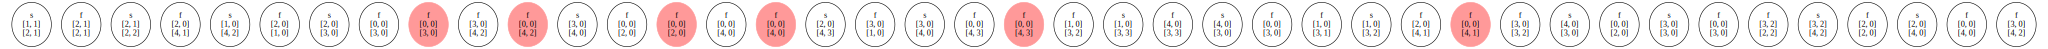

In [22]:
#枝刈り後のゲーム木の表示
root=make_tree()
pruse(root)
g=Digraph()
make_graph(root, g)